<a href="https://colab.research.google.com/github/raut-rahul-2137/Log-Counting/blob/main/model_traning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello")

hello


In [2]:
!nvidia-smi

Fri Jul 26 13:58:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install ultralytics

In [4]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode-checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 760, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 440, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'mode-checks' is not a valid YOLO argument. Similar arguments are i.e. ['checks=<function collect_system_info at 0x7895e750ed40>'].

    Arguments received: ['yolo', 'mode-checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'obb', 'detect', 'pose', 'segment'}
                MODE (required) is one of {'track', 'export', 'val', 'benchmark', 'predict', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that ove

In [5]:
!pip install roboflow

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="4tKiLso3QYA822IueAiP")
project = rf.workspace("logscountmeasure").project("logs-count-and-measurement")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.66, to fix: `pip install ultralytics==8.0.196`


In [8]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Logs-Count-and-Measurement-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

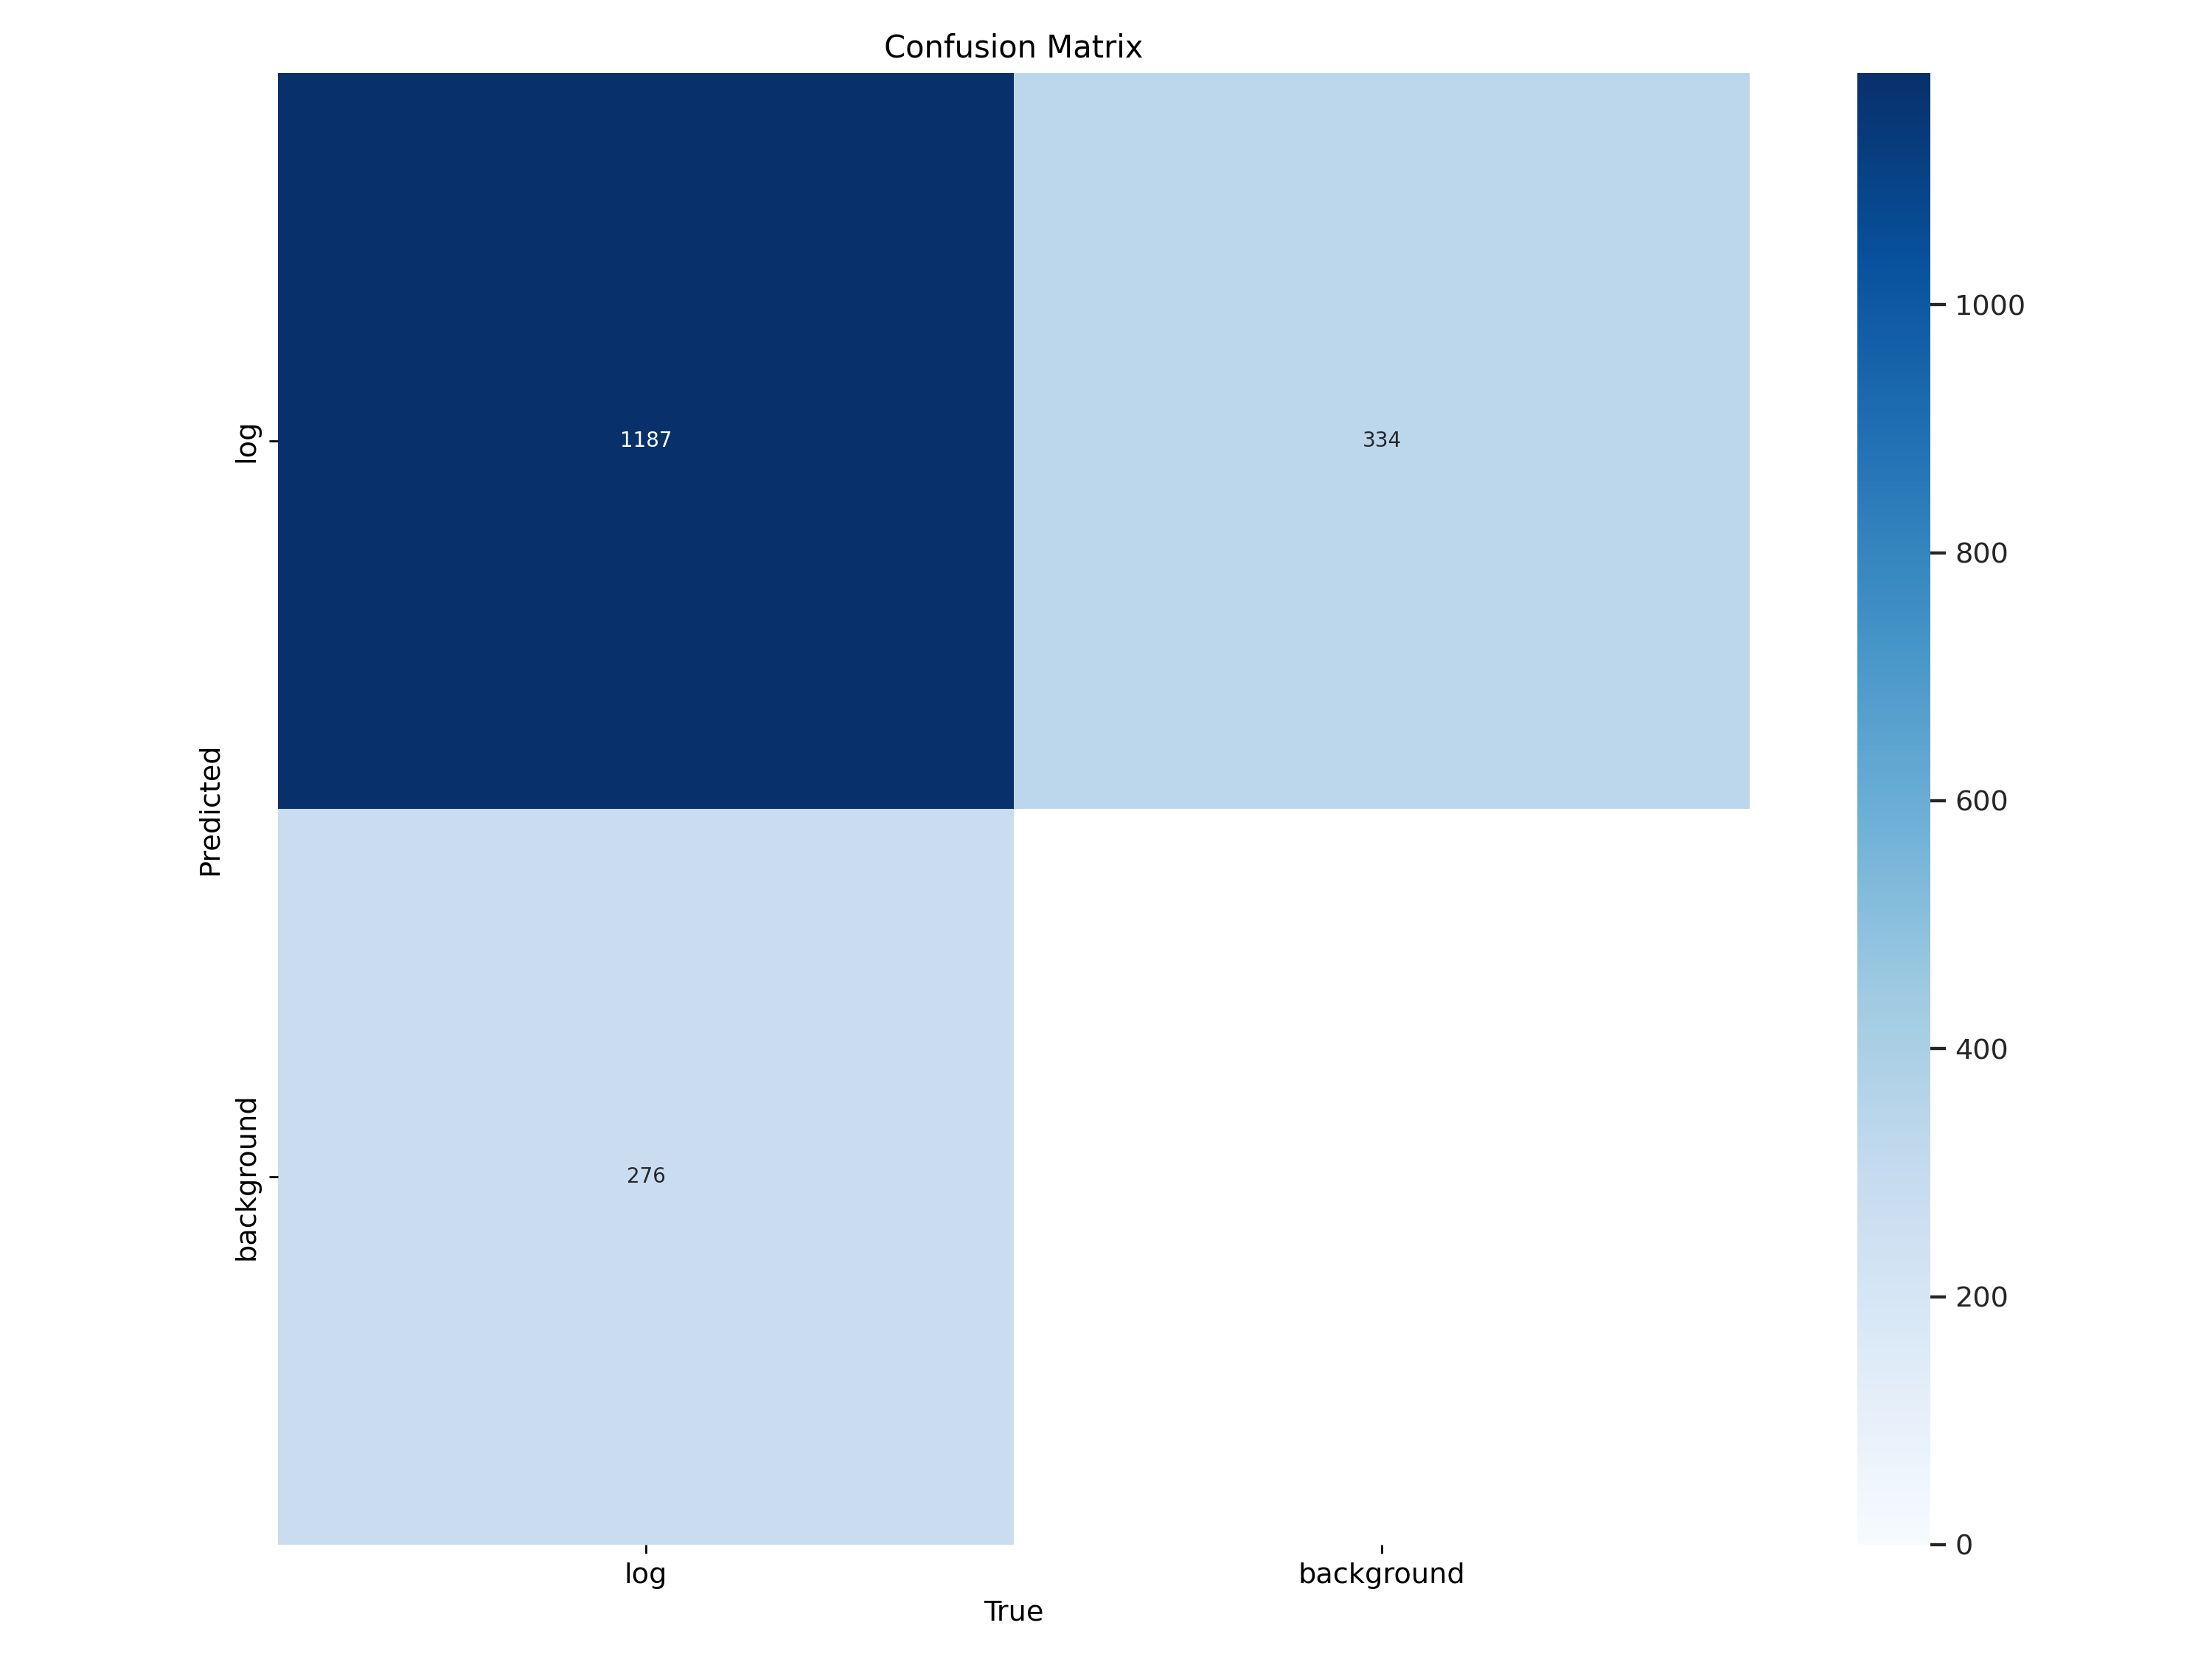

In [10]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png',width=600)

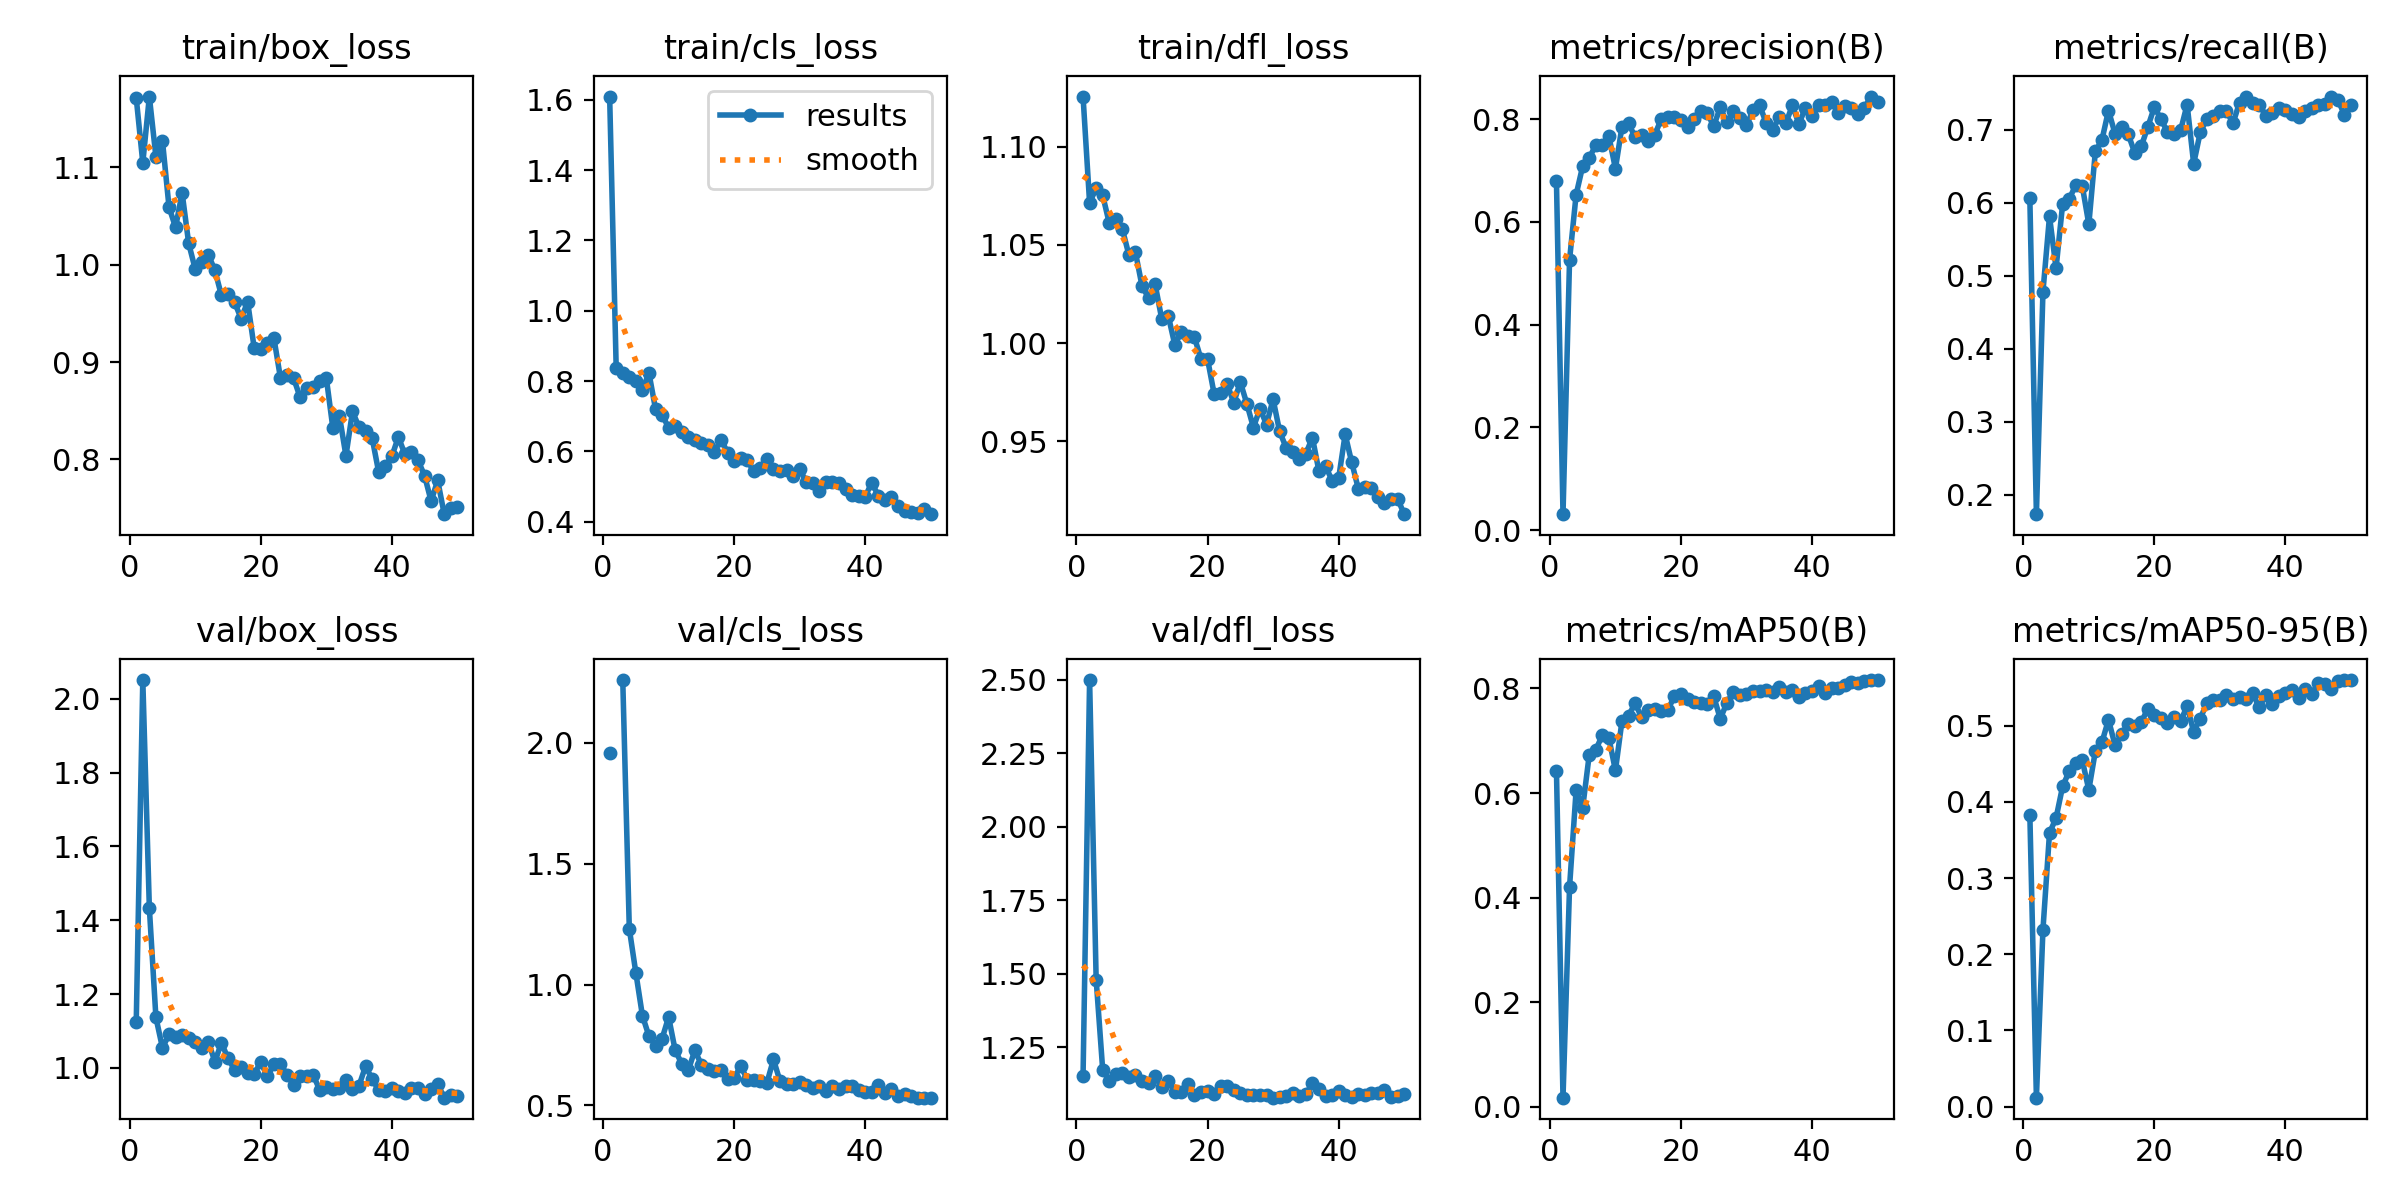

In [11]:
Image(filename=f'/content/runs/detect/train2/results.png',width=600)

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf = 0.7 source={dataset.location}/test/images

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/14 /content/Logs-Count-and-Measurement-3/test/images/1000_F_111963084_ZeJXk6LRFjjDostK2waXulZXwUcRk7oA_jpg.rf.6f700251afcf9c25045d3e10d0e3455f.jpg: 640x640 8 logs, 37.1ms
image 2/14 /content/Logs-Count-and-Measurement-3/test/images/Central_African_Republic_-_Log_transport_jpg.rf.c70d4c18e23ddfb81589990bd1dfcc0d.jpg: 640x640 11 logs, 37.1ms
image 3/14 /content/Logs-Count-and-Measurement-3/test/images/Heavy-Duty-Chain-Belt-Conveyor-Wood-Logs-Conveyor-485_jpg.rf.33a7d1f60785fe3dbce0a4f46acf2f46.jpg: 640x640 1 log, 37.0ms
image 4/14 /content/Logs-Count-and-Measurement-3/test/images/bunch-of-logs-stacked-up-stack-of-cut-trees-T4FXD7_jpg.rf.459755a6a8dbd0131ee6cd20f2c5be73.jpg: 640x640 101 logs, 37.0ms
image 5/14 /content/Logs-Count-and-Measurement-3/test/images/bunch-wood-logs-189800039_jpg.rf.4f95d381cf5252ab8111c

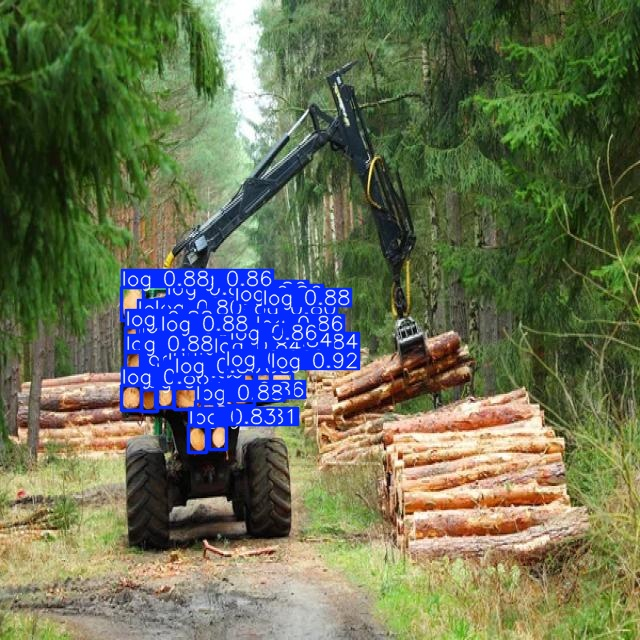

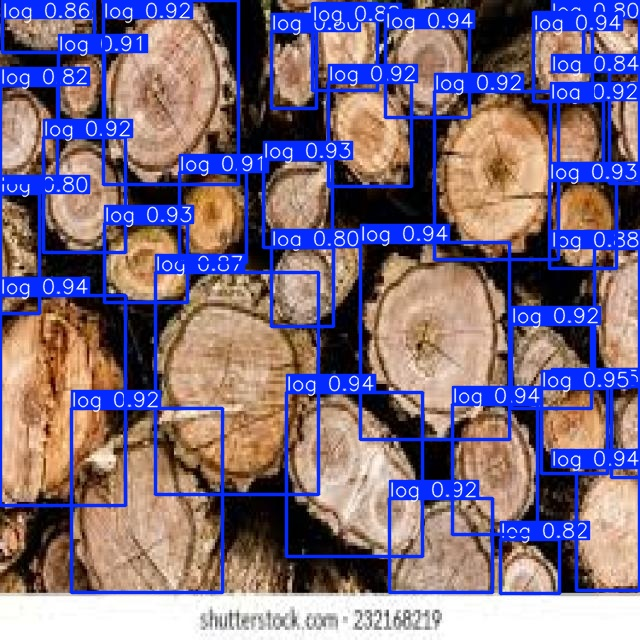

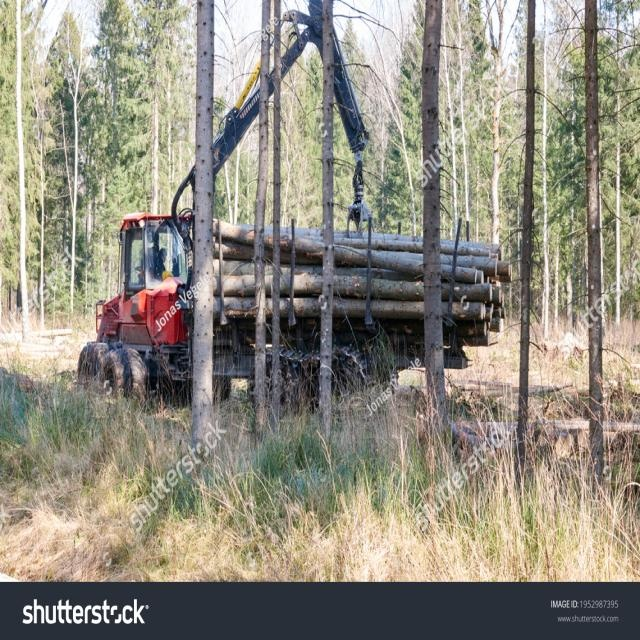

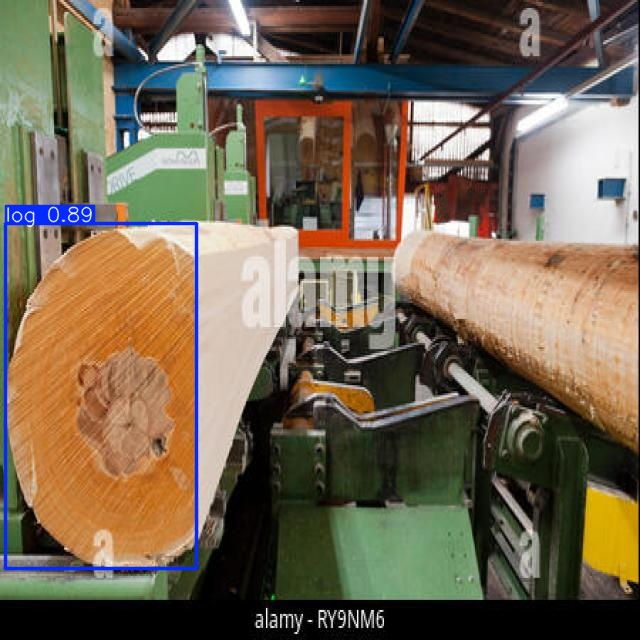

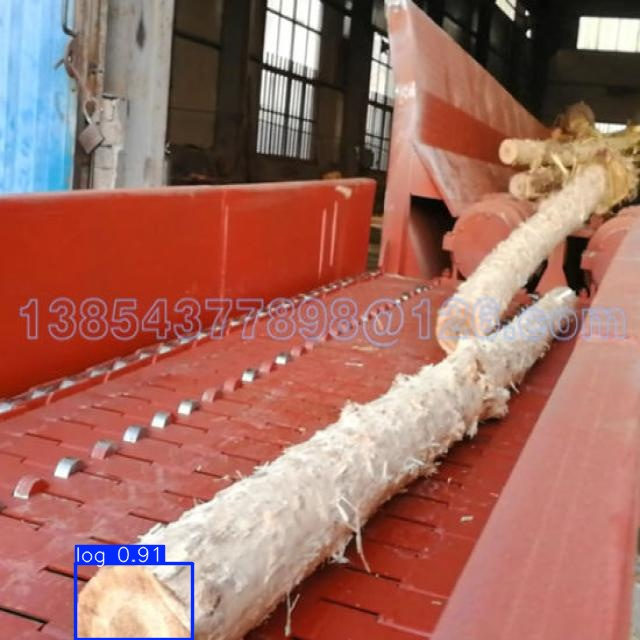

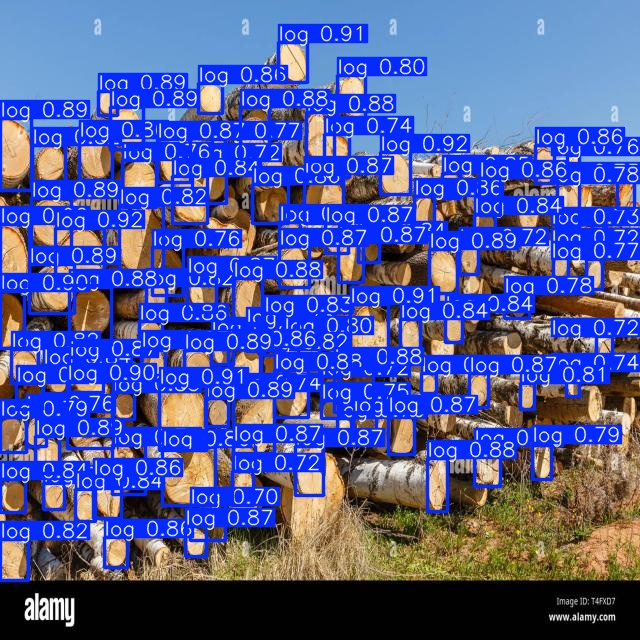

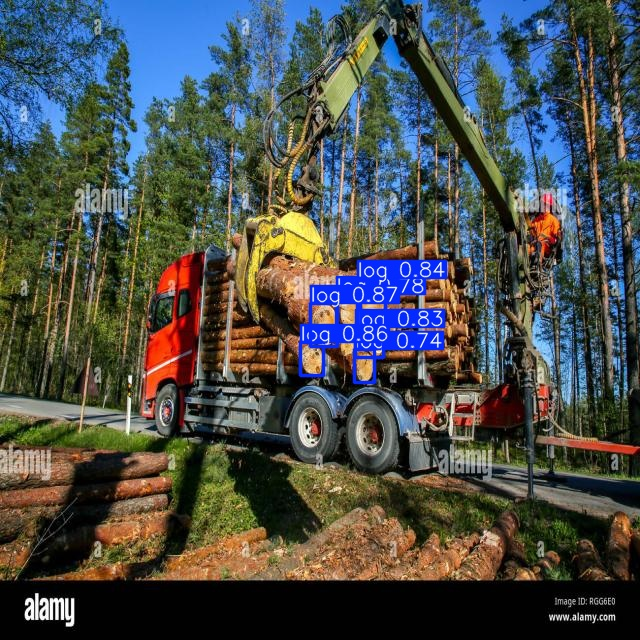

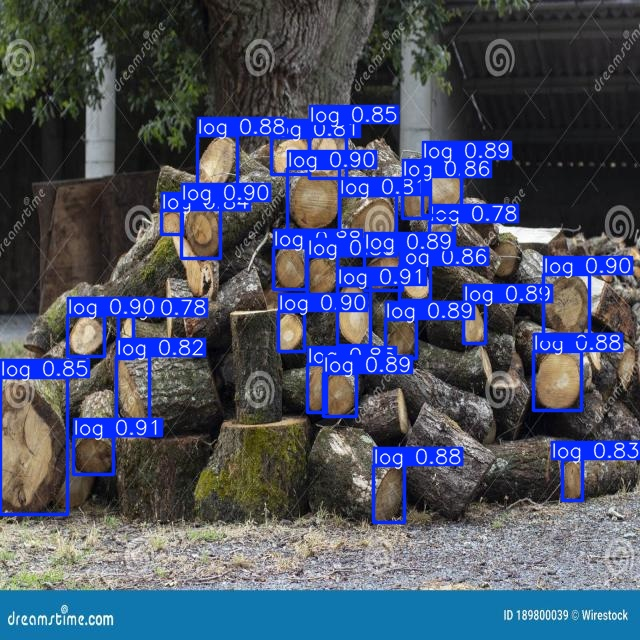

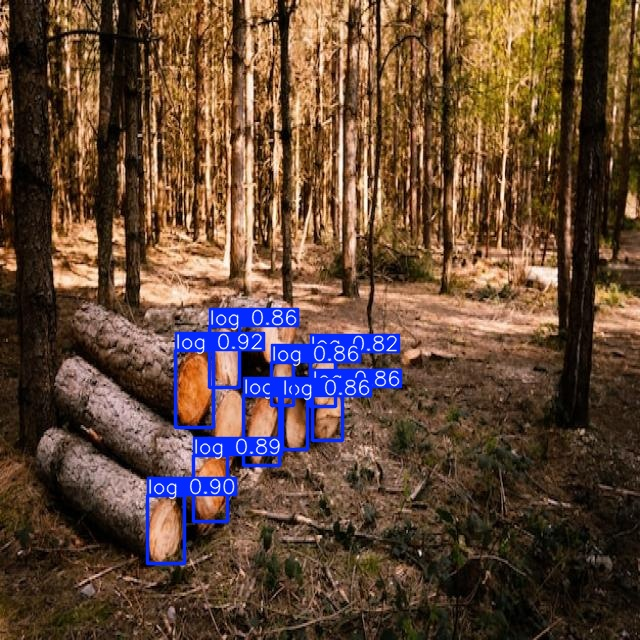

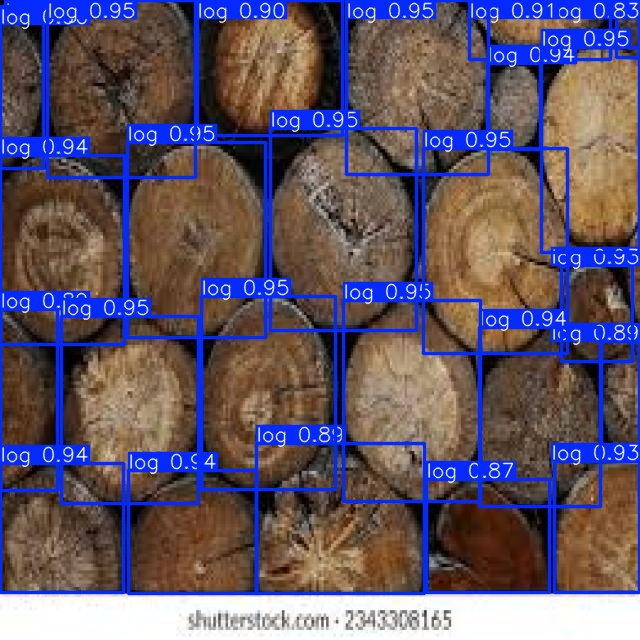

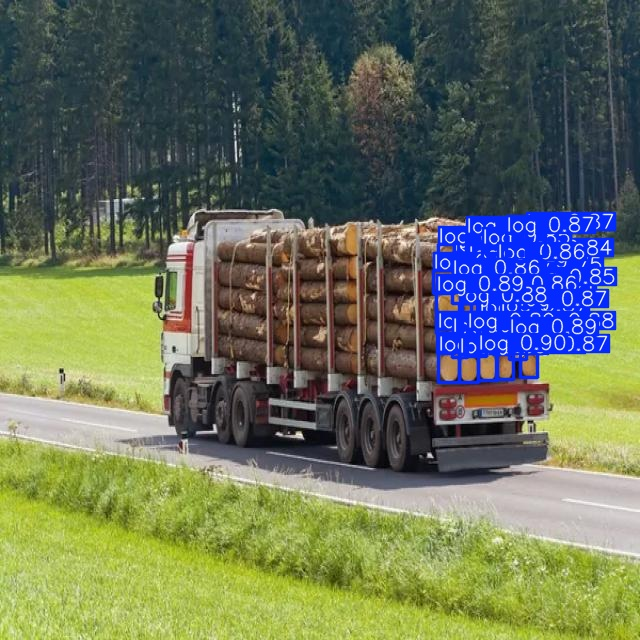

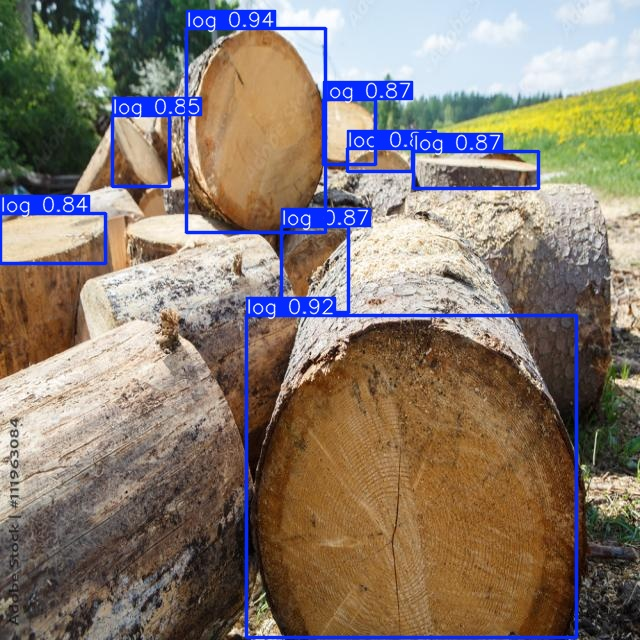

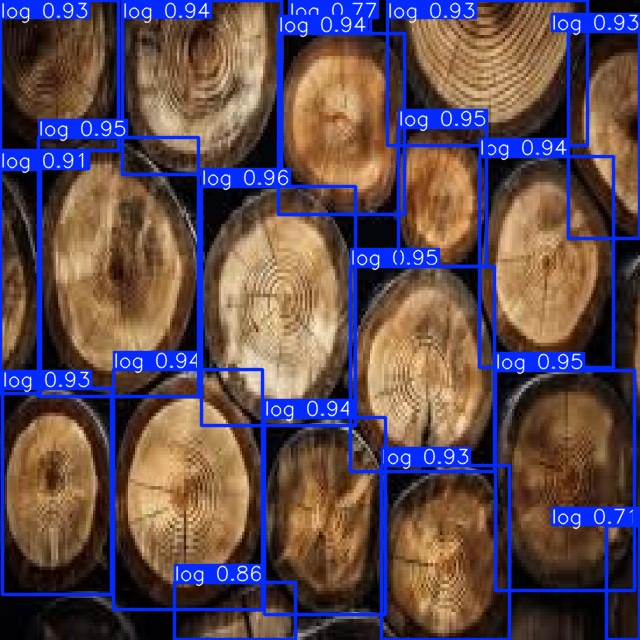

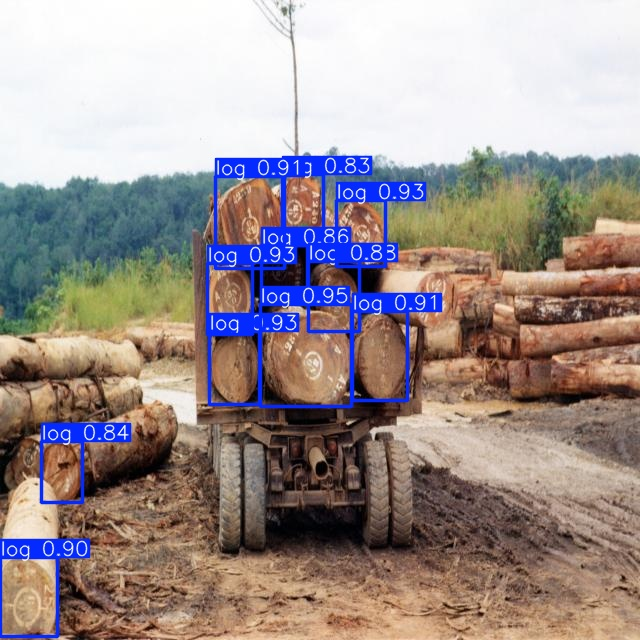

In [16]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, width=600))
  print("\n")

In [19]:
model = YOLO("/content/runs/detect/train2/weights/best.pt")

results = model('/content/Logs-Count-and-Measurement-3/valid/images/COLOURBOX6987144_jpg.rf.ca68a2d3ee179709e795d4d676f798f6.jpg', stream=True)  # return a generator of Results objects

# Process results generator
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to dis


image 1/1 /content/Logs-Count-and-Measurement-3/valid/images/COLOURBOX6987144_jpg.rf.ca68a2d3ee179709e795d4d676f798f6.jpg: 640x640 26 logs, 37.0ms
Speed: 2.9ms preprocess, 37.0ms inference, 554.6ms postprocess per image at shape (1, 3, 640, 640)


In [20]:
print(keypoints)

None


In [23]:
# Load the YOLO model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Perform inference on the image and get results
results = model('/content/Logs-Count-and-Measurement-3/valid/images/COLOURBOX6987144_jpg.rf.ca68a2d3ee179709e795d4d676f798f6.jpg', stream=True)  # return a generator of Results objects

# Initialize a counter for the detected objects
detected_objects_count = 0

# Process results generator
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs

    # Count the number of detected objects (bounding boxes)
    detected_objects_count += len(boxes)

    # Display and save the results
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

# Print the total number of detected objects
print(f"Total number of detected objects: {detected_objects_count}")



image 1/1 /content/Logs-Count-and-Measurement-3/valid/images/COLOURBOX6987144_jpg.rf.ca68a2d3ee179709e795d4d676f798f6.jpg: 640x640 26 logs, 37.1ms
Speed: 1.8ms preprocess, 37.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Total number of detected objects: 26


In [26]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


In [28]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from PIL import Image
import io
import joblib  # or use pickle
from ultralytics import YOLO  # Make sure you have the correct import for your YOLO model
import tempfile

# Load your trained YOLO model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Streamlit app
st.title("Object Detection and Counting")

st.write("Upload an image to detect and count objects:")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Load the image
    image = Image.open(uploaded_file)

    # Save the uploaded image to a temporary file
    with tempfile.NamedTemporaryFile(delete=False) as temp_file:
        temp_filename = temp_file.name
        image.save(temp_filename)

    # Perform inference on the image and get results
    results = model(temp_filename)

    # Extract the first (and only) result
    result = results[0]

    # Count the number of detected objects (bounding boxes)
    detected_objects_count = len(result.boxes)

    # Display the original and result images
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Display and save the result image with detections
    result_image = result.show()

    # Display the result image with detections
    st.image(result_image, caption="Result Image with Detections", use_column_width=True)

    # Print the total number of detected objects
    st.write(f"Total number of detected objects: {detected_objects_count}")


Writing app.py


In [36]:
!pip install gradio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━

In [44]:
%%writefile model.py
import gradio as gr
from PIL import Image
from ultralytics import YOLO
import tempfile

# Load your trained YOLO model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

def detect_objects(image):
    # Save the uploaded image to a temporary file
    with tempfile.NamedTemporaryFile(delete=False, suffix='.jpg') as temp_file:
        temp_filename = temp_file.name
        image.save(temp_filename)

    # Perform inference on the image and get results
    results = model(temp_filename)

    # Extract the first (and only) result
    result = results[0]

    # Count the number of detected objects (bounding boxes)
    detected_objects_count = len(result.boxes)

    # Create a result image with detections
    result_image = result.show()

    return image, result_image, detected_objects_count

# Create the Gradio interface with updated API
interface = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Image(type="pil", label="Uploaded Image"),
        gr.Image(type="pil", label="Result Image with Detections"),
        gr.Textbox(label="Total number of detected objects")
    ],
    title="Log Counting",
    description="Upload an image to detect and count objects."
)

# Launch the Gradio app
if __name__ == "__main__":
    interface.launch(share=True)


Writing model.py


In [47]:
import os

# Get the current working directory
current_directory = os.getcwd()

print(f"Current working directory: {current_directory}")


Current working directory: /content


In [46]:
!python model.py


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://ec47eae23bf6547ca9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)

image 1/1 /tmp/tmpljn2hv5a.jpg: 640x640 27 logs, 36.3ms
Speed: 2.7ms preprocess, 36.3ms inference, 920.1ms postprocess per image at shape (1, 3, 640, 640)
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpygaa6t_i.PNG'

image 1/1 /tmp/tmpa5hz5s09.jpg: 640x640 22 logs, 36.4ms
Speed: 1.8ms preprocess, 36.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/